In [1]:
from qiskit.utils import QuantumInstance
from qiskit import IBMQ, Aer
from main import *
import QuantumTomography as qt
from time import time
%precision 3

'%.3f'

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-csic', group='internal', project='iff-csic')
backend  = provider.get_backend('ibm_lagos')
noise_model = NoiseModel.from_backend(backend)
# noise_model = decoherence_noise(T1=5e3, T2=200e3)
# quantum_instance = QuantumInstance( Aer.get_backend('aer_simulator'), shots=2**13, noise_model=noise_model )
quantum_instance = QuantumInstance( backend, shots=2**13 )

In [3]:
import qiskit.tools.jupyter
backend

<IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q-csic', group='internal', project='iff-csic')>

In [4]:
circs_all, circs_pkg, pkg_idx, parall_qubits = device_process_measurement_tomography_circuits( backend )

In [5]:
parall_qubits

[[(1, 3), (4, 5)], [(3, 5), (0, 1)], [(1, 2), (5, 6)]]

In [6]:
job1 = backend.retrieve_job('616f5990cea63358bd144f6c')
job2 = backend.retrieve_job('616f5997dd30e90910e61666')

In [7]:
results_1 = job1.result()
results_2 = job2.result()
results   = [results_1,results_2]

In [8]:
choi_single, choi_double, gateset  = device_process_measurement_tomography_fitter( results, circs_all, circs_pkg, pkg_idx, parall_qubits, out=1, paralell=True )

In [9]:
num_qubits = len(choi_single)

quantities = []
for k in range(num_qubits):
    quantities.append( Quantities( choi_single[k][0], choi_single[k][1] ) )

quantities_2 = []
cros_quantities = []
for i in range(len(parall_qubits)):
    for j in range(len(parall_qubits[i])):
        k = parall_qubits[i][j][0]
        l = parall_qubits[i][j][1]
        cros_quantities.append( Cross_Quantities( choi_single[k][0], choi_single[k][1],
                                                  choi_single[l][0], choi_single[l][1],
                                                  choi_double[i][j][0], choi_double[i][j][1]
                                                )  )
        quantities_2.append( Quantities( choi_double[i][j][0], choi_double[i][j][1] ) )

In [10]:
gateset

[[array([0.999+0.j   , 0.026-0.023j, 0.026+0.023j, 0.001+0.j   ]),
  array([ 9.997e-01+0.j   , -1.595e-02-0.007j, -1.595e-02+0.007j,  3.234e-04+0.j   ]),
  array([ 0.998+0.j   , -0.026-0.033j, -0.026+0.033j,  0.002+0.j   ]),
  array([9.996e-01+0.j   , 1.663e-02-0.011j, 1.663e-02+0.011j, 3.939e-04+0.j   ]),
  array([0.992+0.j   , 0.008-0.091j, 0.008+0.091j, 0.008+0.j   ]),
  array([0.975+0.j   , 0.131+0.083j, 0.131-0.083j, 0.025+0.j   ]),
  array([9.997e-01+0.j   , 1.496e-02+0.006j, 1.496e-02-0.006j, 2.673e-04+0.j   ])],
 [array([[1.000e+00+2.000e-23j, 4.879e-05-2.046e-22j],
         [3.199e-05-4.043e-06j, 3.198e-05-4.039e-06j],
         [3.199e-05+4.043e-06j, 3.198e-05+4.039e-06j],
         [9.634e-06-3.053e-22j, 1.000e+00+2.435e-22j]]),
  array([[ 1.000e+00+3.010e-22j,  4.356e-05+2.215e-22j],
         [-3.586e-05-5.856e-06j, -3.586e-05-5.857e-06j],
         [-3.586e-05+5.856e-06j, -3.586e-05+5.857e-06j],
         [ 1.100e-03-4.031e-23j,  9.993e-01+9.487e-23j]]),
  array([[9.998e-01-3.

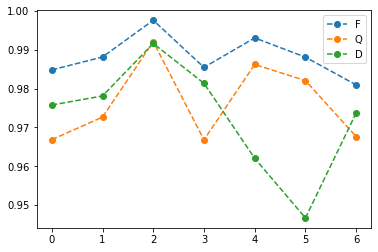

In [11]:
plt.plot( quantities, '--o' )
plt.legend( ['F','Q', 'D'] )
# plt.savefig( 'fidelities_IBM_7_qubits.pdf', bbox_inches = 'tight' )

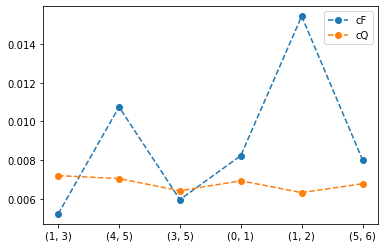

In [12]:
plt.plot( np.array(cros_quantities), '--o' )
plt.legend( ['cF','cQ'] )
plt.xticks( [0,1,2,3,4,5], [(1,3),(4,5),(3,5),(0,1),(1,2),(5,6)] );

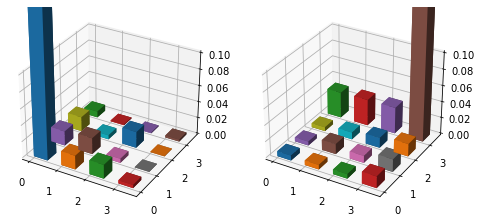

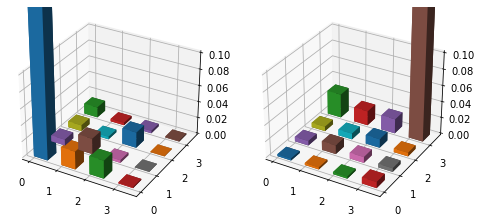

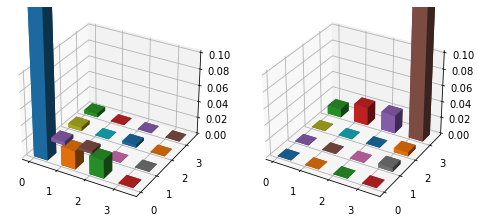

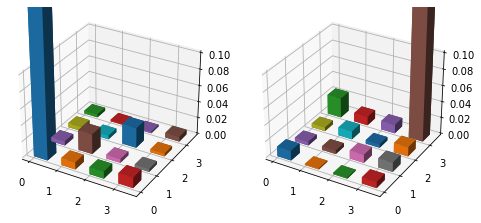

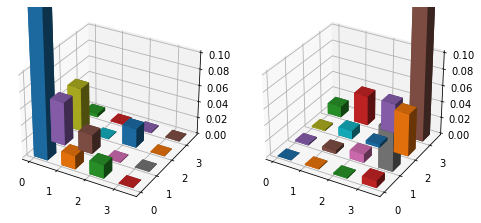

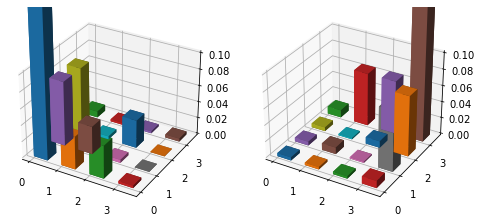

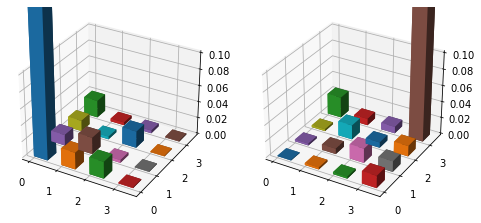

In [13]:
for j in range(num_qubits):
    f = Abs_Bars3D(choi_single[j][1], [0,1e-1] ) 
#     f.savefig( 'choi_qubit_{}'.format(j) , bbox_inches = 'tight' , transparent=True)

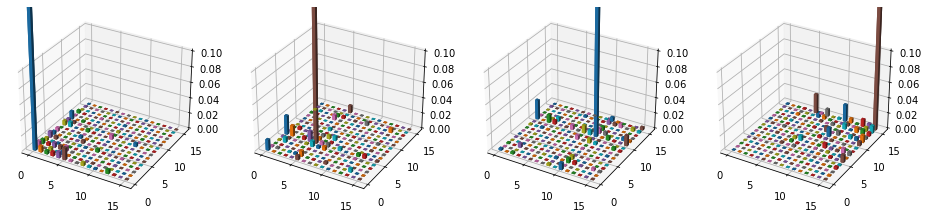

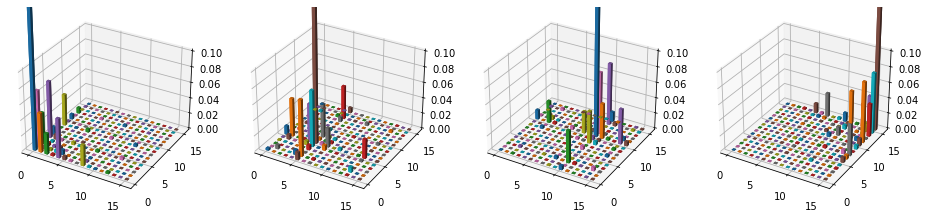

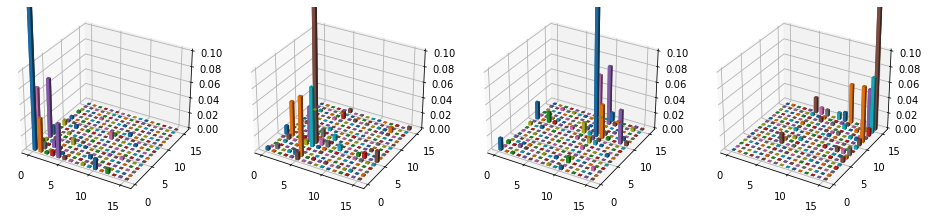

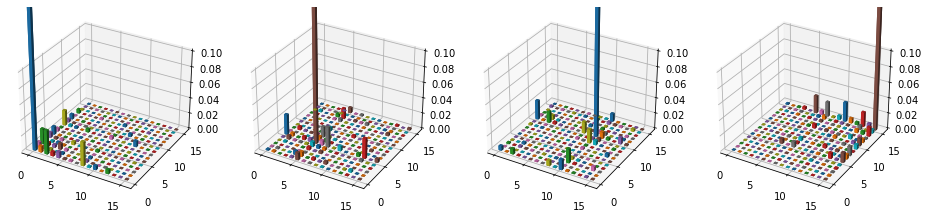

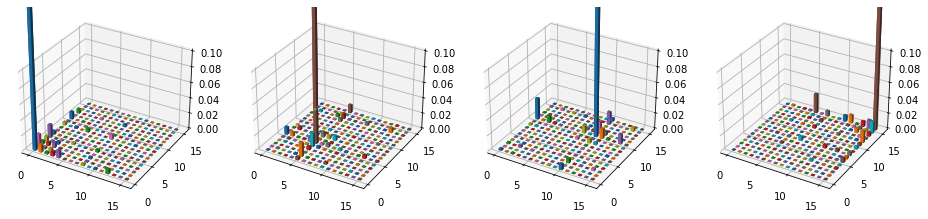

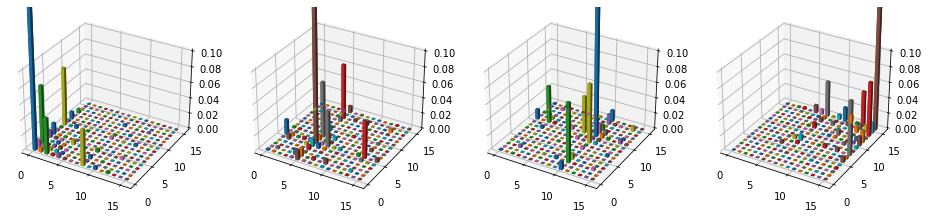

In [14]:
for j in range(3):
    for k in range(2):
        f = Abs_Bars3D(choi_double[j][k][1], [0,1e-1], True ) 
#         f.savefig( 'choi_two_qubits_{}'.format(parall_qubits[j][k]) , bbox_inches = 'tight' , transparent=True)